---

##  Dataset Summary: `salaries.csv`

https://www.kaggle.com/code/muhammedaliyilmazz/salary-prediction-using-multiple-regression-models

This dataset contains **133,349 rows** and **11 columns**, each representing various attributes related to tech or data job roles and their corresponding salaries. The target variable is `salary_in_usd`, which represents the normalized annual salary of each employee in USD.

The dataset provides a comprehensive view of salaries based on multiple demographic, job-related, and company-related factors.

---

##  Feature Descriptions

| Column Name                                       | Data Type   | Description                                                                                                                                                   |
| ------------------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`work_year`**                                   | Integer     | The year in which the salary data was reported (e.g., 2023, 2024, 2025). Useful for time-based salary trends.                                                 |
| **`experience_level`**                            | Categorical | The level of experience the employee has:                                                                                                                     |
| → `EN`: Entry-level                               |             |                                                                                                                                                               |
| → `MI`: Mid-level                                 |             |                                                                                                                                                               |
| → `SE`: Senior-level                              |             |                                                                                                                                                               |
| → `EX`: Executive-level                           |             |                                                                                                                                                               |
| **`employment_type`**                             | Categorical | Type of employment contract:                                                                                                                                  |
| → `FT`: Full-time                                 |             |                                                                                                                                                               |
| → `PT`: Part-time                                 |             |                                                                                                                                                               |
| → `CT`: Contract-based                            |             |                                                                                                                                                               |
| → `FL`: Freelance                                 |             |                                                                                                                                                               |
| **`job_title`**                                   | Text        | The employee’s job role, such as `Data Scientist`, `ML Engineer`, `Data Analyst`, `Software Engineer`, etc. Useful for analyzing role-specific salary trends. |
| **`salary`**                                      | Numeric     | The employee's gross salary in the original currency before conversion. Not standardized, so less useful for comparison.                                      |
| **`salary_currency`**                             | Text        | The original currency code in which the salary was paid (e.g., USD, EUR, INR).                                                                                |
| **`salary_in_usd`**                               | Numeric     | 🔥 **Target variable** — The employee’s annual salary converted into USD. This is what we aim to predict.                                                     |
| **`employee_residence`**                          | Text        | The country where the employee resides, regardless of the company's location. Used to detect geographic salary disparities.                                   |
| **`remote_ratio`**                                | Integer     | Percentage of remote work:                                                                                                                                    |
| → `0`: On-site                                    |             |                                                                                                                                                               |
| → `50`: Hybrid                                    |             |                                                                                                                                                               |
| → `100`: Fully remote                             |             |                                                                                                                                                               |
| Affects salary depending on remote work policies. |             |                                                                                                                                                               |
| **`company_location`**                            | Text        | Country where the company is headquartered. Used for regional company-level salary comparisons.                                                               |
| **`company_size`**                                | Categorical | Company scale:                                                                                                                                                |
| → `S`: Small (1–50 employees)                     |             |                                                                                                                                                               |
| → `M`: Medium (51–250 employees)                  |             |                                                                                                                                                               |
| → `L`: Large (251+ employees)                     |             |                                                                                                                                                               |
| Often correlates with salary range.               |             |                                                                                                                                                               |

---

# STEP 1: Import Required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# STEP 2: Load Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/salaries-for-data-science-jobs")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salaries-for-data-science-jobs


In [3]:
df=pd.read_csv(os.path.join(path, "salaries.csv"))

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [5]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
136752,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
136753,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
136754,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
136755,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
136756,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [7]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.nunique()

,0
work_year,6
experience_level,4
employment_type,4
job_title,398
salary,11444
salary_currency,26
salary_in_usd,12651
employee_residence,102
remote_ratio,3
company_location,95


# STEP 3: Data Cleaning

In [10]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# STEP 4: Exploratory Data Analysis (EDA)

## Salary Distribution Overview

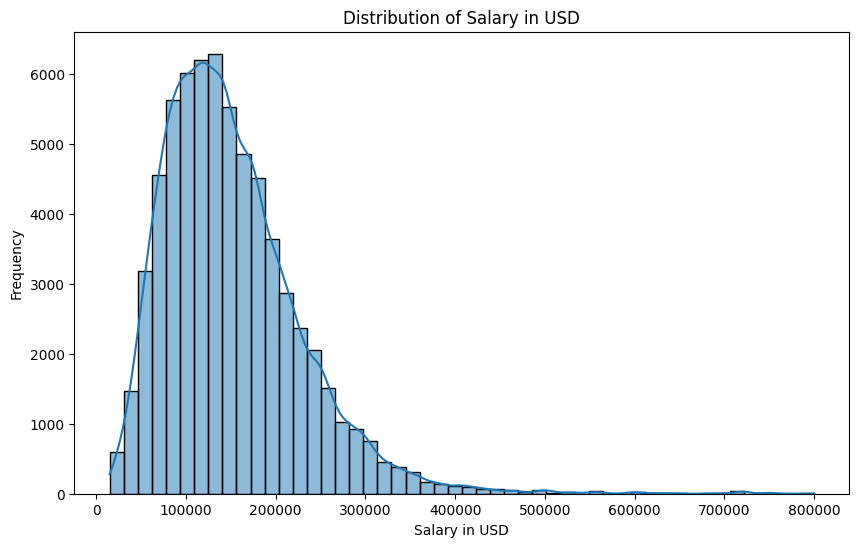

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df["salary_in_usd"], bins=50, kde=True)
plt.title("Distribution of Salary in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

## Salaries by Experience Level

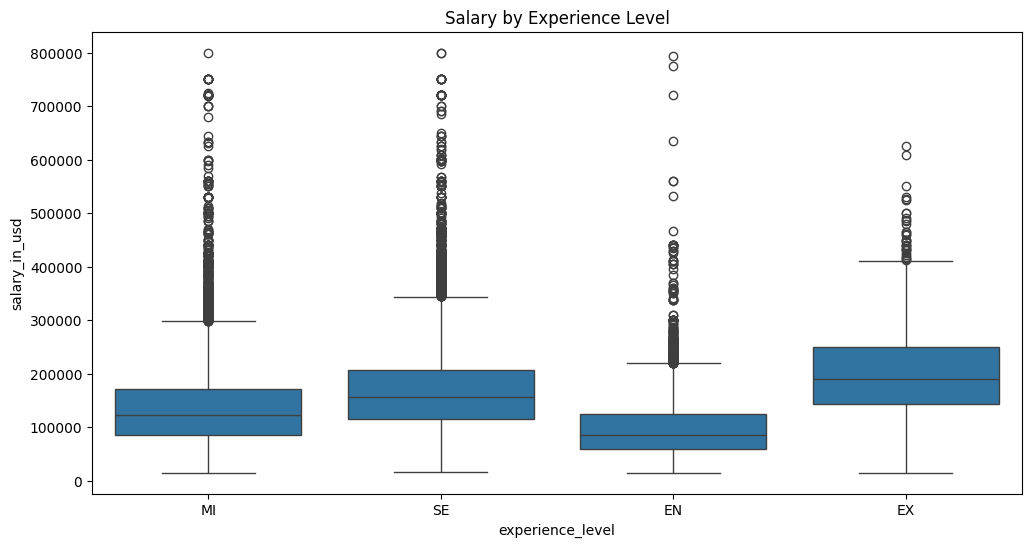

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)
plt.title("Salary by Experience Level")
plt.show()

## Salaries by Employment Type

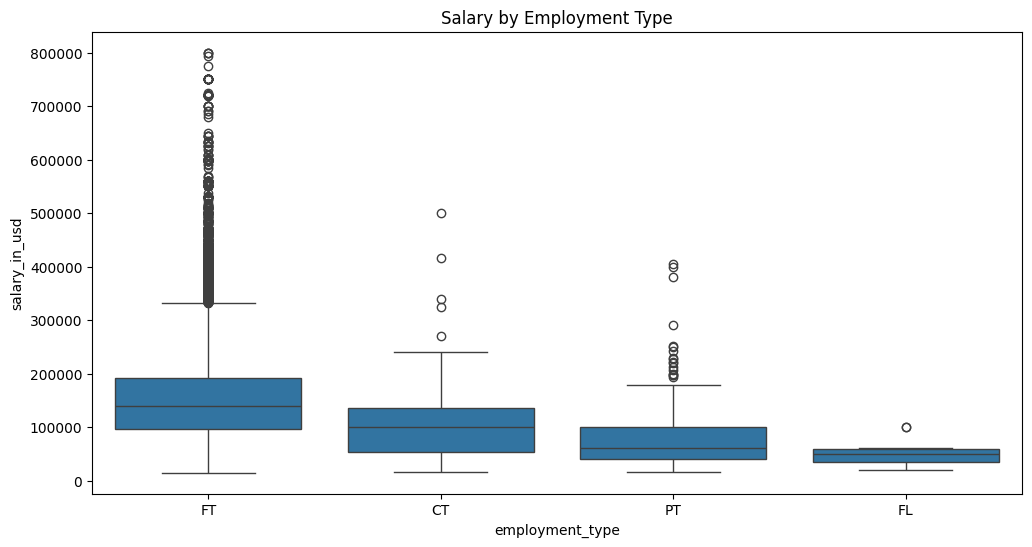

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)
plt.title("Salary by Employment Type")
plt.show()

## Salaries by Company Size

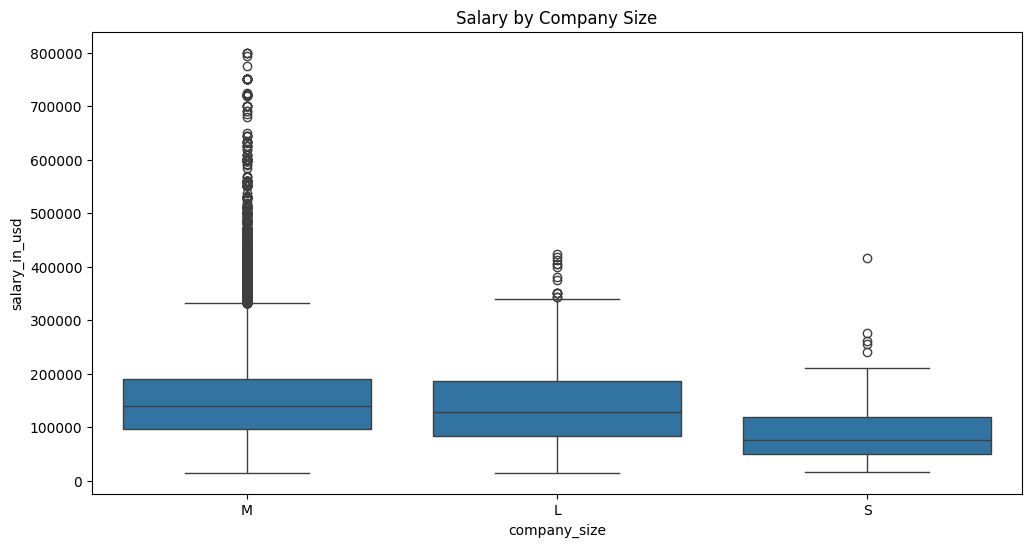

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="company_size", y="salary_in_usd", data=df)
plt.title("Salary by Company Size")
plt.show()

# STEP 5: Feature Engineering

In [15]:
df['job_title'] = df['job_title'].str.lower()
top_jobs = df['job_title'].value_counts().head(15).index
df = df[df['job_title'].isin(top_jobs)]

# STEP 6: Data Preprocessing

In [16]:
categorical_cols = ['experience_level', 'employment_type', 'job_title',
                    'employee_residence', 'company_location', 'company_size']
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = df_encoded["salary_in_usd"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=537)

# STEP 7: Model Training

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=537),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=537),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=537),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


Linear Regression Results:
Mean Squared Error: 5240804823.19
R² Score: 0.15

Ridge Regression Results:
Mean Squared Error: 5240766271.31
R² Score: 0.15

Lasso Regression Results:
Mean Squared Error: 5240743789.97
R² Score: 0.15

Random Forest Results:
Mean Squared Error: 4585807409.62
R² Score: 0.26

Gradient Boosting Results:
Mean Squared Error: 4634817117.13
R² Score: 0.25

AdaBoost Results:
Mean Squared Error: 5337613920.29
R² Score: 0.14

Extra Trees Results:
Mean Squared Error: 4614979308.03
R² Score: 0.26

Support Vector Regressor Results:
Mean Squared Error: 6295954955.52
R² Score: -0.02

K-Nearest Neighbors Results:
Mean Squared Error: 5533448406.41
R² Score: 0.11


# STEP 8: Comparison Plot

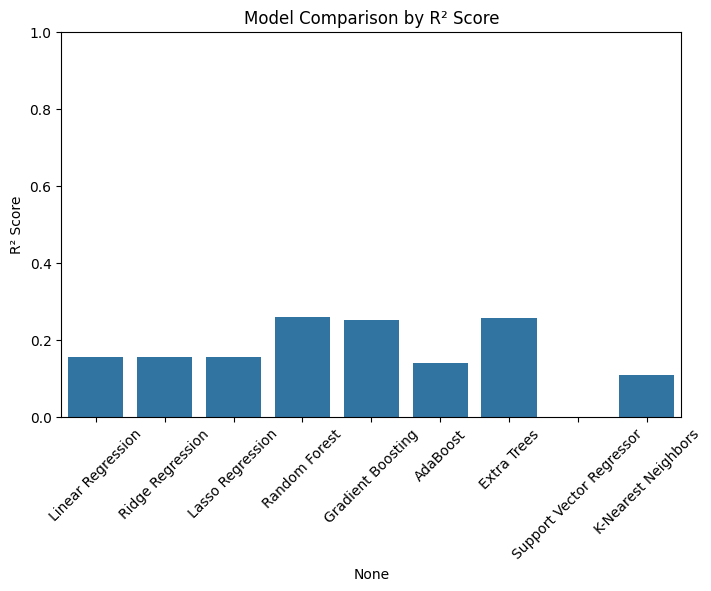

In [18]:
result_df = pd.DataFrame(results).T
plt.figure(figsize=(8, 5))
sns.barplot(x=result_df.index, y=result_df["R2"])
plt.title("Model Comparison by R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

---

## Project Summary

**Title:** *Salary Prediction Using Multiple Regression Models*

---

###  Step 1–3: Data Preparation

* **Loaded data** and performed `df.info()` and `df.head()` to understand the structure.
* **Removed duplicates** and ensured there were no missing values.
* Normalized text data (e.g., made `job_title` lowercase).
* Filtered for the **top 15 most frequent job titles** to simplify modeling.

---

###  Step 4: Exploratory Data Analysis (EDA)

Performed multiple **visualizations** using Seaborn and Matplotlib:

1. **Salary Distribution:**

   * Right-skewed distribution
   * Salaries mostly under \$200k, with some outliers

2. **Salary by Experience Level:**

   * Clear salary increase with experience
   * Executive-level roles earn significantly more

3. **Salary by Employment Type:**

   * Full-time jobs (FT) pay significantly more
   * Freelance and part-time have wider salary ranges

4. **Salary by Company Size:**

   * Larger companies (L) tend to pay better on average
   * More variability in medium-sized companies

---

###  Step 5–6: Feature Engineering & Preprocessing

* Applied **Label Encoding** to categorical columns:

  * `experience_level`, `employment_type`, `job_title`, `company_location`, etc.
* Used **StandardScaler** to normalize numeric features.
* Defined:

  ```python
  X = features (excluding salary & currency)  
  y = salary_in_usd  
  ```
* **Train-Test Split**: 80% train / 20% test with `random_state=42`

---

###  Step 7: Model Training

Trained and compared **9 regression models**:

| Model Type               | Description                              |
| ------------------------ | ---------------------------------------- |
| Linear Regression        | Basic linear relationship                |
| Ridge Regression         | L2 regularization to reduce overfitting  |
| Lasso Regression         | L1 regularization for feature selection  |
| Random Forest            | Ensemble of decision trees (bagging)     |
| Gradient Boosting        | Boosting with residual fitting           |
| AdaBoost                 | Adaptive boosting on weak learners       |
| Extra Trees              | Similar to RF but with extra randomness  |
| Support Vector Regressor | Non-linear boundary fitting with kernels |
| K-Nearest Neighbors      | Lazy algorithm based on proximity        |

Each model was evaluated with:

* **Mean Squared Error (MSE)**
* **R² Score**

All results were stored in a dictionary and printed per model.

---

###  Step 8: Model Comparison Plot

Used `sns.barplot()` to visualize the **R² scores of all models**.

* **Best performers:**

  *  Random Forest
  *  Gradient Boosting
  *  Extra Trees

* **Linear/Ridge/Lasso:** Baseline models with moderate performance

* **SVR / KNN / AdaBoost:** Less accurate on large, high-variance data

---

# Thank you for taking the time to review my work. I would be very happy if you could upvote! 😊

---

